strict digraph "" {
	graph [epsilon=0.001,
		rankdir=LR
	];
	"Load range and type:
Residential load, below 2MVA"	[color=red];
	"Voltage range:
Voltage level is:LV
Zonal voltage range is:6.6-33kV
Distribution transformer voltage range is:220-240V"	[color=green];
	"Load range and type:
Residential load, below 2MVA" -> "Voltage range:
Voltage level is:LV
Zonal voltage range is:6.6-33kV
Distribution transformer voltage range is:220-240V";
	"Topology generator"	[color=red];
	"Voltage range:
Voltage level is:LV
Zonal voltage range is:6.6-33kV
Distribution transformer voltage range is:220-240V" -> "Topology generator";
	"Area:
0.73km^2"	[color=red];
	"Density:
Normal"	[color=black];
	"Area:
0.73km^2" -> "Density:
Normal";
	"Number of loads:
680"	[color=red];
	"Number of loads:
680" -> "Density:
Normal";
	"Density:
Normal" -> "Topology generator";
	"Reconfigurability:
Yes"	[color=red];
	Functionalities	[color=black];
	"Reconfigurability:
Yes" -> Functionalities;
	"Reconfigurability:
Yes" -> "R

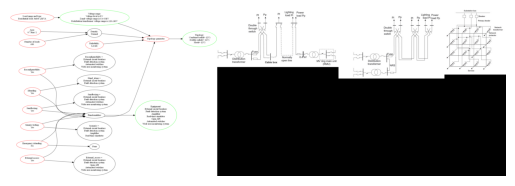

strict digraph "" {
	graph [epsilon=0.001,
		rankdir=LR
	];
	"Load range and type:
Commercial load, below 5MVA"	[color=red];
	"Voltage range:
Voltage level is:LV
Zonal voltage range is:6.6-33kV
Distribution transformer voltage range is:380y/220V"	[color=green];
	"Load range and type:
Commercial load, below 5MVA" -> "Voltage range:
Voltage level is:LV
Zonal voltage range is:6.6-33kV
Distribution transformer voltage range is:380y/220V";
	"Topology generator"	[color=red];
	"Voltage range:
Voltage level is:LV
Zonal voltage range is:6.6-33kV
Distribution transformer voltage range is:380y/220V" -> "Topology generator";
	"Area:
1.5km^2"	[color=red];
	"Density:
low"	[color=black];
	"Area:
1.5km^2" -> "Density:
low";
	"Number of loads:
105"	[color=red];
	"Number of loads:
105" -> "Density:
low";
	"Density:
low" -> "Topology generator";
	"Reconfigurability:
Nan"	[color=red];
	Functionalities	[color=black];
	"Reconfigurability:
Nan" -> Functionalities;
	"Reconfigurability:
Nan" -> None;
	"Islandi

KeyboardInterrupt: 

In [2]:
import pandas as pd
import rule_engine
from PIL import Image
import pygraphviz as pgv
import json
data=[]
df = pd.DataFrame(data, columns=["Case Study", "Functionality Inputs", "Density level","Reliability level", "Load Type", "Voltage level",  "Suggested Topologies", "Components and Infrastructures Outputs"])
Use_Case_results= {}
for i in range (20):
    functions=''
    N= i+1
    File_name= 'System_features ({})'.format(N)
    with open(File_name) as file:
        content = file.read()
    df1= json.loads(content)
    keys = list(df1.keys())
    values = list(df1.values())
    DF = {}
    # Iterate through each key-value pair in the dictionary
    for key, value in df1.items():
        # Renaming and modifying keys as per requirements
        if key == 'Approximately how many individual load points (like households, businesses, etc_x002e_) are you catering to (Number of PCC points)?':
            DF['N_load'] = int(value)
        elif key == 'What is the estimated area of coverage for your grid (in square kilometers)?':
            DF['Area'] = float(value)
        elif key == 'In which category could you put the network considering the type and the average power of a typical demand?':
            DF['L_class'] = value
        elif key == 'How would you like to prioritize the reliability of your grid?':
            DF['Reliability_Level'] = value
        elif key == 'Do you want to test scenarios e_x002e_g_x002e_ PV generation emulation with an amplifier on your\n  grid?':
            DF['Scenario_func'] = value
        elif key == 'Do you want to allow external parties to test their network experiments on your\n  grid?':
            DF['Ext_net_func'] = value
        elif key == 'If yes, how much is the accessibility of these parties?':
            DF['Ext_access'] = value
        elif key == 'If yes, do the customers have the option to be a part of the experience or choose to be unaffected by the experiment?':
            DF['L_flex'] = value
        elif key == 'Would you prefer the grid to have a manual reconfiguration system or an automatic fault detection and isolation system?':
            DF['Reconfig_func'] = value
        elif key == 'Can the grid operate in isolated mode?':
            DF['Islanded_func'] = value
    Use_case= DF

    Dic_dens=[{'n':'1',
               'density level':'low',
               'min':0, 
               'max':100},
             {'n':'2',
              'density level': 'Normal',
               'min':100, 
               'max':1000},
             {'n':'3',
              'density level':'high',
               'min':1000, 
               'max':100000000}]

    S1= '{}>=min and {}<=max'.format(Use_case['N_load']/Use_case['Area'],Use_case['N_load']/Use_case['Area'])
    R1= rule_engine.Rule(S1)
    Density_filtered= R1.filter(Dic_dens)
    for value in Density_filtered:
        Density=value['n']
        Density_level=value['density level']
    Use_case['L_class']=Use_case['L_class'].replace(u'Â\xa0', u' ')
    Dic_VL=[{'VL':'MV',
            'lc':'Large industrial load, 20-40MW',
            'DP_voltage':'11-22kV',
            'Zonal_voltage':'11-22kV'},
             {'VL':'MV',
              'lc':'Large commercial load, 5-20MW',
             'DP_voltage':'6.6-11kV',
             'Zonal_voltage':'11-33kV'},
             {'VL':'MV',
              'lc':'Industrial load, 5-20MVA',
             'DP_voltage':'6.6-11kV',
             'Zonal_voltage':'11-33kV'},
             {'VL':'LV',
              'lc':'Commercial load, below 5MVA',
             'DP_voltage':'380y/220V',
             'Zonal_voltage':'6.6-33kV'},
             {'VL':'LV',
              'lc':'Residential load, below 2MVA',
             'DP_voltage':'220-240V',
             'Zonal_voltage':'6.6-33kV'}]

    S2= '"{}"==lc'.format(Use_case['L_class'])

    R2= rule_engine.Rule(S2)
    VL_filtered= R2.filter(Dic_VL)
    for value in VL_filtered:
        VL=value['VL']
        DP_voltage=value['DP_voltage']
        Zonal_voltage=value['Zonal_voltage']
       
    if Use_case['Reliability_Level']== "High Reliability: For critical loads like hospitals, industries, water pump plants, emergency lighting, and essential commercial operations, the system's reliability must be maximized. Minimal disruptions are essential.":
        Reliability= 'Level1'
    elif Use_case['Reliability_Level']== "Moderate Reliability: For loads of moderate importance, such as residential consumers, the system allows for interruptions that permit a manual change of the power source.":
        Reliability= 'Level2'
    elif Use_case['Reliability_Level']== "Low Reliability: For less critical loads, longer interruption times are acceptable. This level of reliability is adequate for conducting repairs or replacing faulty equipment in the distribution system.":
        Reliability= 'Level3'       

    Dic_topology=[
        {
            "Topology": "Radial (MV)",
            "Voltage_level": "MV",
            "Reliability": "Level3",
            "Density": "1, 2",
            "Reconfigureability": "Nan",
            "Sandboxing": "Nan",
            "image_T":'3. Radial nonreserved distribution network.'
        },

        {
            "Topology": "Ring (MV)",
            "Voltage_level": "MV",
            "Reliability": "Level2",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Nan",
            "image_T":'4. Ring bus'
        },
        {
            "Topology": "Double radial (MV)",
            "Voltage_level": "MV",
            "Reliability": "Level2",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Sandboxing",
            "image_T":'5.Multiradial distribution network with automatic reserve switching on'
        },
        {
            "Topology": "Multiradial (MV)",
            "Voltage_level": "MV",
            "Reliability": "Level1",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Sandboxing",
            "image_T":'5.Multiradial distribution network with automatic reserve switching on'
        },
        {
            "Topology": "Meshed (MV)",
            "Voltage_level": "MV",
            "Reliability": "Level1",
            "Density": "2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Sandboxing",
            "image_T":'13. MV mesh'
        },
        {
            "Topology": "Radial (LV)",
            "Voltage_level": "LV",
            "Reliability": "Level3",
            "Density": "1, 2",
            "Reconfigureability": "Nan",
            "Sandboxing": "Nan",
            "image_T":'8. Supply system to a third category customer.'
        },
        {
            "Topology": "Open-Ring (LV)",
            "Voltage_level": "LV",
            "Reliability": "Level2",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Nan",
            "image_T":'9. Open - loop 0.4 kV network.'
        },
        {
            "Topology": "Combined radial (LV)",
            "Voltage_level": "LV",
            "Reliability": "Level2",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Sandboxing",
            "image_T":'10.Combined open-double radial LV network.'
        },
        {
            "Topology": "Double radial (LV)",
            "Voltage_level": "LV",
            "Reliability": "Level2",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Sandboxing",
            "image_T":'11. Double radial LV network. ARS = automatic reserve switching.'
        },
        {
            "Topology": "Open-Ring+ (LV)",
            "Voltage_level": "LV",
            "Reliability": "Level1",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Nan",
            "image_T":'9. Open - loop 0.4 kV network. - Copy'
        },
        {
            "Topology": "Combined radial+ (LV)",
            "Voltage_level": "LV",
            "Reliability": "Level1",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Sandboxing",
            "image_T":'10.Combined open-double radial LV network. - Copy'
        },
        {
            "Topology": "Double radial1+ (LV)",
            "Voltage_level": "LV",
            "Reliability": "Level1",
            "Density": "1,2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Sandboxing",
            "image_T":'11. Double radial LV network. ARS = automatic reserve switching. - Copy'

        },
        {
            "Topology": "Mesh+ (LV)",
            "Voltage_level": "LV",
            "Reliability": "Level1",
            "Density": "2,3",
            "Reconfigureability": "Reconfigureability",
            "Sandboxing": "Sandboxing",
            "image_T": '14.mesh LV'
        },
    ]
    if Use_case['Ext_net_func']=='Yes':
        functions= functions+ 'External access, '
        if Use_case['L_flex']=='Yes, they can choose':
            Sandboxing_func= 'Sandboxing'
        else:
            Sandboxing_func= 'Nan'
    else:
            Sandboxing_func= 'Nan'

    if Use_case['Reconfig_func']=='Manual reconfiguration system':
        Reconfig_func1='Yes'
        functions= functions+ 'Reconfigurability, '
    elif Use_case['Reconfig_func']=='Automatic reconfiguration system':
        Reconfig_func1='Yes'
        functions= functions+ 'Reconfigurability, '
    elif Use_case['Reconfig_func']=='None of them is necessary':
        Reconfig_func1='Nan'

    if Sandboxing_func== 'Sandboxing':
        Sandboxing= 'Sandboxing'
    else:
        Sandboxing= 'Nan'
    if Reconfig_func1== 'Yes':
        Reconfigureability='Reconfigureability'
    else:
        Reconfigureability='Nan'
    Reliability1= Reliability
    Reconfigureability1= Reconfigureability
    String_note=''
    Error_type=''
    if Reconfigureability1== 'Nan' and Density=='3':
        Error_type= 'Error4'
        String_note=String_note + '**There is no suggestion for a Living lab with no reconfigurability function and havng high density at the same time.  So, reconfogurability functionality is automatically set on Manual reconfiguration system'
        Reconfigureability= 'Reconfigureability'
    if Reconfigureability1== 'Reconfigureability' and Reliability1=='Level3':
        Error_type= 'Error1'
        String_note=String_note + '**There is no suggestion for a Living lab with low reliability level and havng reconfigurability function at the same time.  So, reliability is automatically set on moderate level'
        Reliability= 'Level2'
    if Reliability1== 'Level3' and Density=='3':
        String_note=String_note + '**There is no suggestion for a Living lab with low reliability level and high density level of loads (in your case) at the same time.  So, reliability is automatically set on moderate level'
        Reliability= 'Level2'
        Error_type= 'Error3'
    if Reliability1== 'Level3' and Sandboxing=='Sandboxing':
        Error_type= 'Error2'
        String_note=String_note + '**There is no suggestion for a Living lab with low reliability level and having the sandboxing functionality (valuntarily choosing to be a part of the tests) at the same time.  So, reliability is automatically set on moderate level'
        Reliability= 'Level2'
    # for situations that the user does not want a functionality but there is a topology that offers the functionality
    if Reconfigureability== 'Reconfigureability' and Sandboxing== "Sandboxing":
        S3= 'Voltage_level=="{}" and Reliability=="{}" and Density=~".*{}.*"and Reconfigureability== "{}" and Sandboxing== "{}"'.format(VL,Reliability,Density,Reconfigureability, Sandboxing)
    elif Reconfigureability== 'Reconfigureability' and Sandboxing== "Nan":
        S3= 'Voltage_level=="{}" and Reliability=="{}" and Density=~".*{}.*"and Reconfigureability== "{}"'.format(VL,Reliability,Density,Reconfigureability)
    elif Reconfigureability== 'Nan' and Sandboxing== "Sandboxing":
        S3= 'Voltage_level=="{}" and Reliability=="{}" and Density=~".*{}.*" and Sandboxing== "{}"'.format(VL,Reliability,Density, Sandboxing)
    elif Reconfigureability== 'Nan' and Sandboxing== "Nan":
        S3= 'Voltage_level=="{}" and Reliability=="{}" and Density=~".*{}.*"'.format(VL,Reliability,Density)

    R3= rule_engine.Rule(S3)
    topology_filtered= R3.filter(Dic_topology)
    T=''
    list_address= []
    for value in topology_filtered:
        Topology=value['Topology']
        T= T+Topology+'\n'
        image_address= value['image_T']+'.jpg'
        list_address=list_address+ [image_address]
        img = Image.open(image_address)
    #     img.show()

    keys = ['External circuit breakers', 'Fault detection system', 'Amplifier', 'Real-time simulator', 'Open API', 'Automated switches', 'Wide area monitoring system', 'Isolating Equipment', 'Local energy management system', 'Local distributed generators', 'Energy storage systems', 'Demand response infrastructure', 'Dispatchables', 'Power balance']

    Funcs = [
        {
            "Stand_alone": 'Yes',
            "Scenario": '-',
            "External_access": '-',
            "Reconfigurability": '-',
            "Sandboxing": '-',
            "LV_L3": '-',
            "Emergency_MG": '-',
            "Eq": [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        },
        {
            "Stand_alone": '-',
            "Scenario": 'Yes',
            "External_access": '-',
            "Reconfigurability": '-',
            "Sandboxing": '-',
            "LV_L3": '-',
            "Emergency_MG": '-',
            "Eq": [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        },
        {
            "Stand_alone": '-',
            "Scenario": '-',
            "External_access": 'Yes',
            "Reconfigurability": '-',
            "Sandboxing": '-',
            "LV_L3": '-',
            "Emergency_MG": '-',
            "Eq": [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
        },
        {
            "Stand_alone": '-',
            "Scenario": '-',
            "External_access": '-',
            "Reconfigurability": 'Yes',
            "Sandboxing": '-',
            "LV_L3": '-',
            "Emergency_MG": '-',
            "Eq": [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
        },
        {
            "Stand_alone": '-',
            "Scenario": '-',
            "External_access": '-',
            "Reconfigurability": '-',
            "Sandboxing": 'Yes',
            "LV_L3": '-',
            "Emergency_MG": '-',
            "Eq": [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
        },
        {
            "Stand_alone": '-',
            "Scenario": '-',
            "External_access": '-',
            "Reconfigurability": '-',
            "Sandboxing": '-',
            "LV_L3": 'Yes',
            "Emergency_MG": '-',
            "Eq": [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
        },
        {
            "Stand_alone": '-',
            "Scenario": '-',
            "External_access": '-',
            "Reconfigurability": '-',
            "Sandboxing": '-',
            "LV_L3": '-',
            "Emergency_MG": 'Yes',
            "Eq": [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
        },
        {
            "Stand_alone": '-',
            "Scenario": '-',
            "External_access": '-',
            "Reconfigurability": '-',
            "Sandboxing": '-',
            "LV_L3": '-',
            "Emergency_MG": '-',
            "Eq": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        }
        
    ]
    
    if Use_case['Islanded_func']=='Yes, it is designed to be self-sufficient':
        Islanded_func1= 'Yes'
        Emergency_MG= 'No'
        functions= functions+ 'Islanding, '
    elif Use_case['Islanded_func']=='No, it is completely dependent on the larger grid':
        Islanded_func1= 'No'
        Emergency_MG= 'No'
    elif  Use_case['Islanded_func']=='It can, but with limited capacity and for a short period during large grid faults':
        Islanded_func1= 'No'
        Emergency_MG= 'Yes'
        functions= functions+ 'Emg Islanding, '
    if Sandboxing_func== 'Sandboxing':
        Sandboxing_func1='Yes'
        functions= functions+ 'Sandboxing, '
    else:
        Sandboxing_func1='No'
    if VL=='LV' and Reliability=='Level3':
        LV_L3='Yes'
    else:
        LV_L3='No'

    S4='Stand_alone=="{}" or Scenario=="{}" or External_access=="{}" or Reconfigurability=="{}" or Sandboxing=="{}" or\
     LV_L3=="{}" or Emergency_MG=="{}" '.format(Islanded_func1,Use_case['Scenario_func'],Use_case['Ext_net_func'],Reconfig_func1,Sandboxing_func1,LV_L3,Emergency_MG)

    Eq1=[0 for _ in range(len(keys))]


    R4= rule_engine.Rule(S4 )
    Funcs_filtered= R4.filter(Funcs)
    Eq1= []
    V=''
    for value in Funcs_filtered:
        Eq1. append(value['Eq'])
    Eq1 = [max(cell_values) for cell_values in zip(*Eq1)]

    #R4.to_graphviz()
    s=[i for i, value in enumerate(Eq1) if value == 1]
    Equipment=''
    for i in s:
        Equipment= Equipment+'\n{}'.format(keys[i])
    Key_func1= ['Stand_alone', 'Scenario', 'External_access', 'Reconfigurability', 'Sandboxing',\
     'LV_L3', 'Emergency_MG' ]
    Key_func2= [Islanded_func1,Use_case['Scenario_func'],Use_case['Ext_net_func'],Reconfig_func1,Sandboxing_func1,LV_L3,Emergency_MG]


    def get_equipment_detailed(i, Funcs, keys):
        Key_func1 = ['Stand_alone', 'Scenario', 'External_access', 'Reconfigurability', 'Sandboxing', 'LV_L3', 'Emergency_MG']


        # Define the rule condition
        S = '{}=="Yes"'.format(Key_func1[i])

        # Create a Rule object
        R = rule_engine.Rule(S)

        # Filter Funcs based on the rule
        Funcs_filtered = R.filter(Funcs)

        # Initialize Equipment_detailed
        Equipment_detailed = ''

        # Loop through filtered values
        for value in Funcs_filtered:
            Eq = value['Eq']
            s = [idx for idx, val in enumerate(Eq) if val == 1]

            # Create Equipment_detailed
            for j in s:
                Equipment_detailed = Equipment_detailed + '\n{}'.format(keys[j])

        return Equipment_detailed

    A = pgv.AGraph(directed=True, strict=True, rankdir="LR")

    s1= 'Load range and type:\n{}'.format(Use_case['L_class'])
    s2= 'Voltage range:\nVoltage level is:{}\nZonal voltage range is:{}\nDistribution transformer voltage range is:{}'.format(VL, Zonal_voltage,DP_voltage)
    s3= 'Area:\n{}km^2'.format(Use_case['Area'])
    s4= 'Number of loads:\n{}'.format(Use_case['N_load'])
    s5= 'Density:\n{}'.format(Density_level)
    s6= 'Reconfigurability:\n{}'.format(Reconfig_func1)
    s7= 'Islanding:\n{}'.format(Islanded_func1)
    s8= 'Sandboxing:\n{}'.format(Sandboxing_func1)
    s9= 'Senario testing:\n{}'.format(Use_case['Scenario_func'])
    s10= 'Emergency islanding:\n{}'.format(Emergency_MG)
    s11= 'External access:\n{}'.format(Use_case['Ext_net_func'])
    s12= 'Reliability:\n{}'.format(Reliability)
    s13= 'Functionalities'
    s14='Topology generator'
    s15= 'Topology:\n{}'.format(T)
    s16= 'Equipment:{}'.format(Equipment)
    i = 0 
    if Key_func2[i]=='Yes':
        Equipment_detailed_result = get_equipment_detailed(i, Funcs, keys)
        s17= '{} = {}'.format(Key_func1[i], Equipment_detailed_result)
    else:
        s17= 'None'
    i = 1
    if Key_func2[i]=='Yes':
        Equipment_detailed_result = get_equipment_detailed(i, Funcs, keys)
        s18= '{} = {}'.format(Key_func1[i], Equipment_detailed_result)
    else:
        s18= 'None'
    i = 2 
    if Key_func2[i]=='Yes':
        Equipment_detailed_result = get_equipment_detailed(i, Funcs, keys)
        s19= '{} = {}'.format(Key_func1[i], Equipment_detailed_result)
    else:
        s19= 'None'
    i = 3 
    if Key_func2[i]=='Yes':
        Equipment_detailed_result = get_equipment_detailed(i, Funcs, keys)
        s20= '{} = {}'.format(Key_func1[i], Equipment_detailed_result)
    else:
        s20= 'None'
    i = 4 
    if Key_func2[i]=='Yes':
        Equipment_detailed_result = get_equipment_detailed(i, Funcs, keys)
        s21= '{} = {}'.format(Key_func1[i], Equipment_detailed_result)
    else:
        s21= 'None'
    i = 5 
    if Key_func2[i]=='Yes':
        Equipment_detailed_result = get_equipment_detailed(i, Funcs, keys)
        s22= '{} = {}'.format(Key_func1[i], Equipment_detailed_result)
    else:
        s22= 'None'
    i = 6 
    if Key_func2[i]=='Yes':
        Equipment_detailed_result = get_equipment_detailed(i, Funcs, keys)
        s23= '{} = {}'.format(Key_func1[i], Equipment_detailed_result)
    else:
        s23= 'None'
    if LV_L3=='Yes' and Reliability!='Level3':
        i= 5
        Equipment_detailed_result = get_equipment_detailed(i, Funcs, keys)
        s24= 'Low voltage and High reliability = {}'.format( Equipment_detailed_result)
        A.add_edge(s24, s16)
        A.add_edge(s15, s24)


    A.add_node(s1, color="red")
    A.add_node(s2, color="green")
    A.add_node(s3, color="red")
    A.add_node(s4, color="red")
    A.add_node(s5, color="black")
    A.add_node(s6, color="red")
    A.add_node(s7, color="red")
    A.add_node(s8, color="red")
    A.add_node(s9, color="red")
    A.add_node(s10, color="red")
    A.add_node(s11, color="red")
    A.add_node(s12, color="red")
    A.add_node(s13, color="black")
    A.add_node(s14, color="red")
    A.add_node(s15, color="green")
    A.add_node(s16, color="green")
    # add some edges
    A.add_edge(s1, s2)
    A.add_edge(s3, s5)
    A.add_edge(s4, s5)
    A.add_edge(s2, s14)
    A.add_edge(s5, s14)
    A.add_edge(s12, s14)
    A.add_edge(s6, s13)
    A.add_edge(s7, s13)
    A.add_edge(s8, s13)
    A.add_edge(s9, s13)
    A.add_edge(s10, s13)
    A.add_edge(s11, s13)
    A.add_edge(s14, s15)
    A.add_edge(s13, s14)
    A.add_edge(s13, s16)
    A.add_edge(s7, s17)
    A.add_edge(s9, s18)
    A.add_edge(s11, s19)
    A.add_edge(s6, s20)
    A.add_edge(s8, s21)
    A.add_edge(s10, s23)
    # adjust a graph parameter
    A.graph_attr["epsilon"] = "0.001"
    print(A.string())  # print dot file to standard output
    A.layout("dot")  # layout with dot
    A.draw("Data flow diagram.png")  # write to file
    img1 = Image.open("Data flow diagram.png")
    img1.show()
    image_paths=  ["Data flow diagram.png"]+list_address

    image_paths
    from PIL import Image
    import matplotlib.pyplot as plt

    # List of image file paths
    # image_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg", "image5.jpg"]

    # Open all images and store them in a list
    images = [Image.open(path) for path in image_paths]

    # Get the total width and height of the combined images
    total_width = sum(image.width for image in images)
    max_height = max(image.height for image in images)

    # Create a blank canvas for the combined images
    combined_image = Image.new('RGB', (total_width, max_height))

    # Paste each image next to the previous one
    x_offset = 0
    for image in images:
        combined_image.paste(image, (x_offset, 0))
        x_offset += image.width

    # Display the combined image
    plt.imshow(combined_image)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
    combined_image.show()

    File_name= 'DFD{}.jpg'.format(N)

    combined_image.save(File_name)
    functions_name= 'functions_use_case{}'.format(N)
    Density_name= 'density_use_case{}'.format(N)
    Reliability_name= 'reliability_use_case{}'.format(N)
    LC_name= 'LC_use_case{}'.format(N)
    VL_name= 'VL_use_case{}'.format(N)
    Topology_name= 'Topology_use_case{}'.format(N)
    Topologies=T.replace(u'\n', u', ')
    Equipment1=Equipment.replace(u'\n', u', ')
    Reliability1=Reliability.replace(u'Level', u'')
    data.append([N, functions, Density, Reliability1, 
                 Use_case['L_class'], VL, Topologies, 
                 Equipment1,Error_type])
    df = pd.DataFrame(data, columns=["Case Study", "Functionality Inputs", "Density level","Reliability level", "Load Type", "Voltage level",  "Suggested Topologies", "Components and Infrastructures Outputs", "Error type"])
df.to_excel("case_studies_data.xlsx", index=False)


In [29]:
Error_type

''